# COVID-19 Global Data Tracker
This notebook analyzes COVID-19 trends in selected countries using data from Our World in Data.  
It covers data loading, cleaning, exploration, visualization, and insights.


# load the dataset and explore its structure 
We load the data, check columns, preview rows and identify missing values 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (make sure the CSV is in your folder)
df = pd.read_csv("owid-covid-data.csv")

# Preview columns and first few rows
print(df.columns)
print(df.head())

# Check for missing values
print(df.isnull().sum())


Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

# Data Cleaning

Filter the dataset to focus on selected countries, convert date column to datetime, and drop rows missing key values.


In [5]:
# filter countries of interest
countries = ["Kenya", "USA", "India"]
df_filtered = df[df['location'].isin(countries)] 

# Drop rows with missing date or critical values
critical_columns = ['date', 'total_cases', 'total_deaths', 'total_vaccinations', 'population']
df = df.dropna(subset=critical_columns)

# Ensure date is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Reset index after cleaning
df = df.reset_index(drop=True)

#Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])
#Handle missing numeric values with fillna() or interpolate().
df = df.ffill()
df = df.bfill()

# Exploratory Data Analysis (EDA)
Plot total cases over time for selected countries,total deaths over time,Compare daily new cases between countries.Calculate the death rate

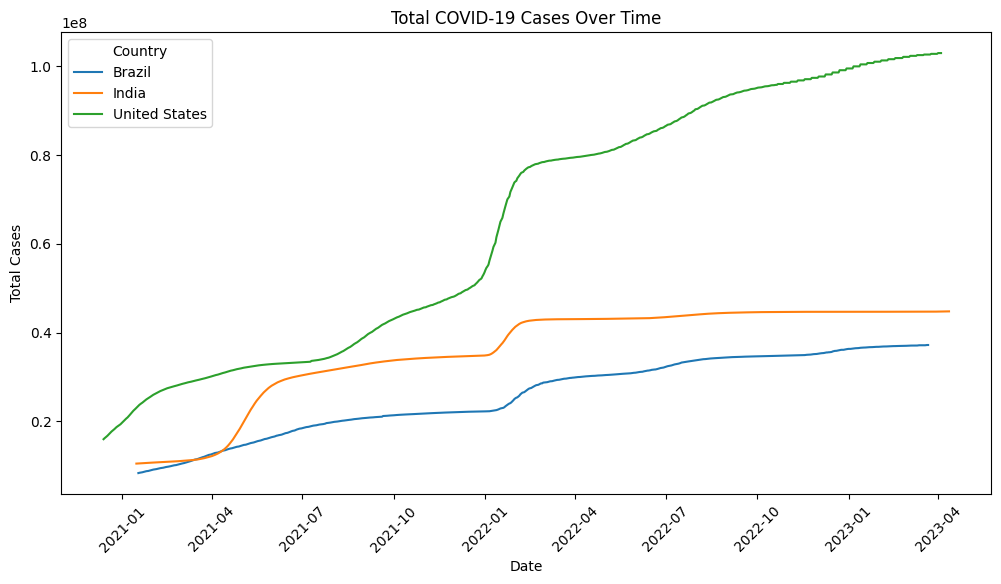

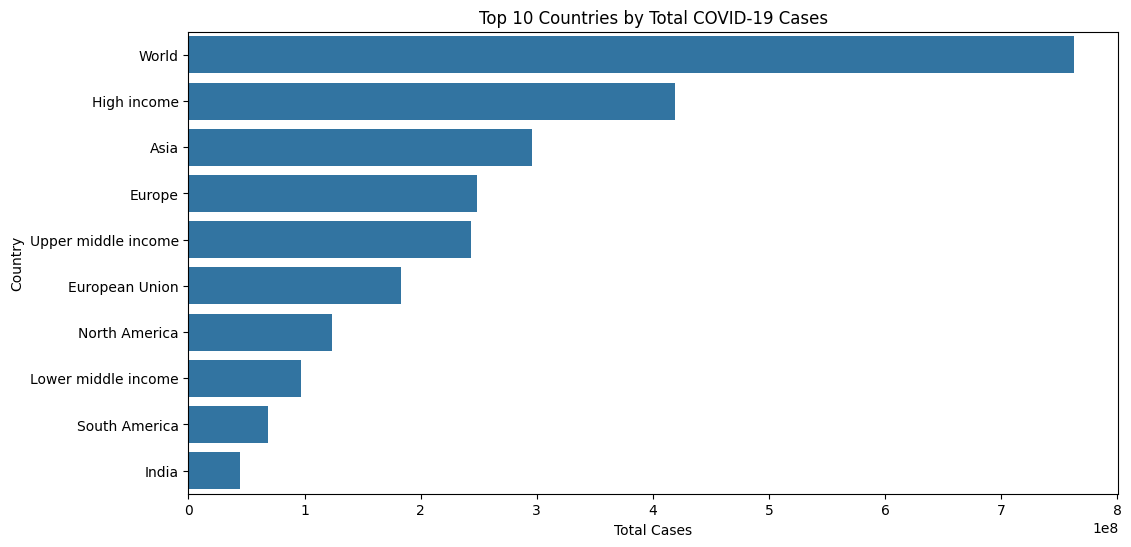

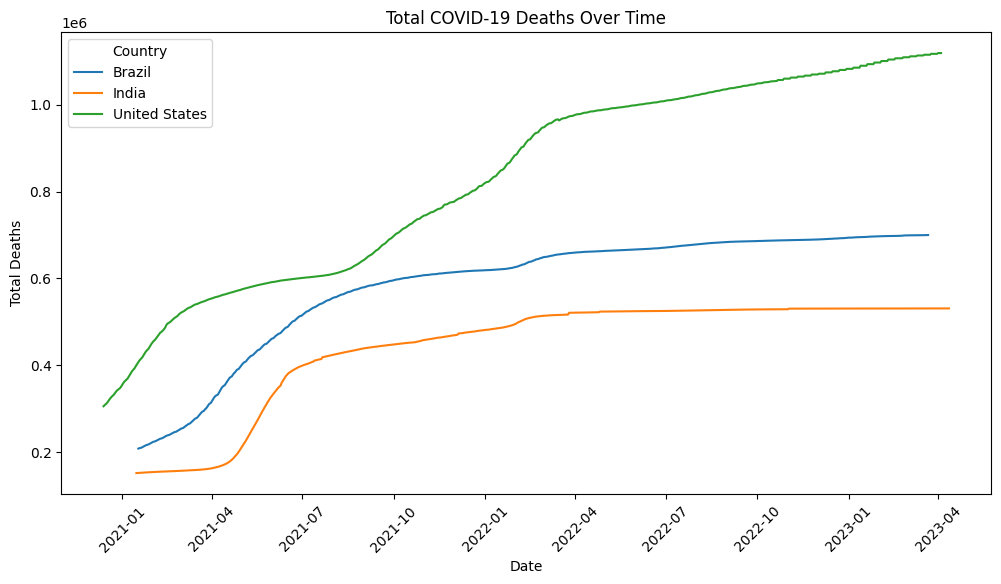

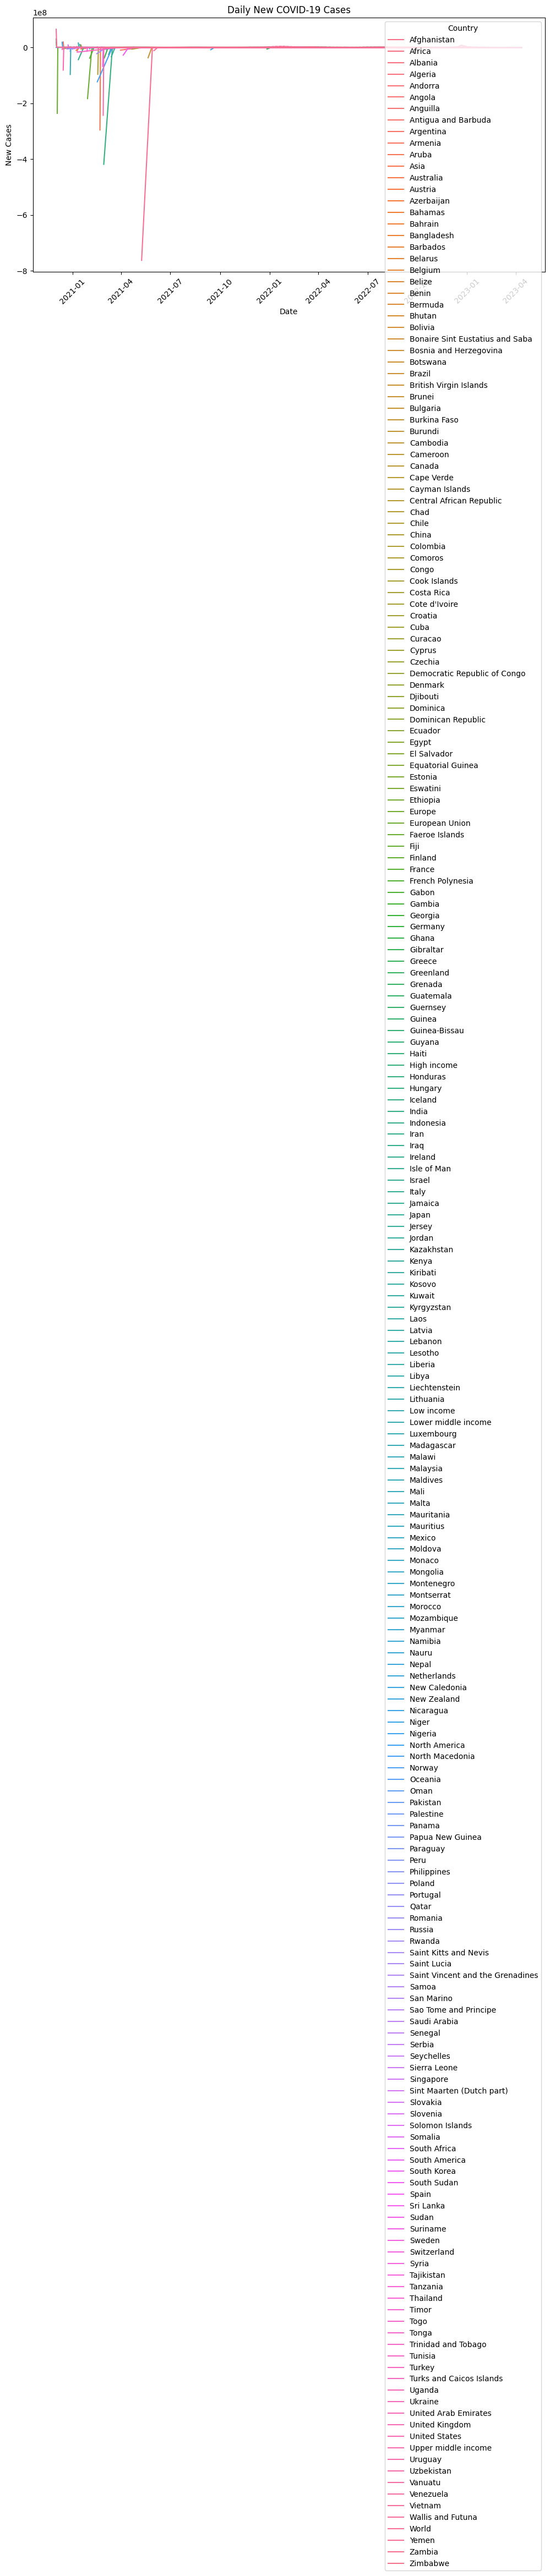

C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


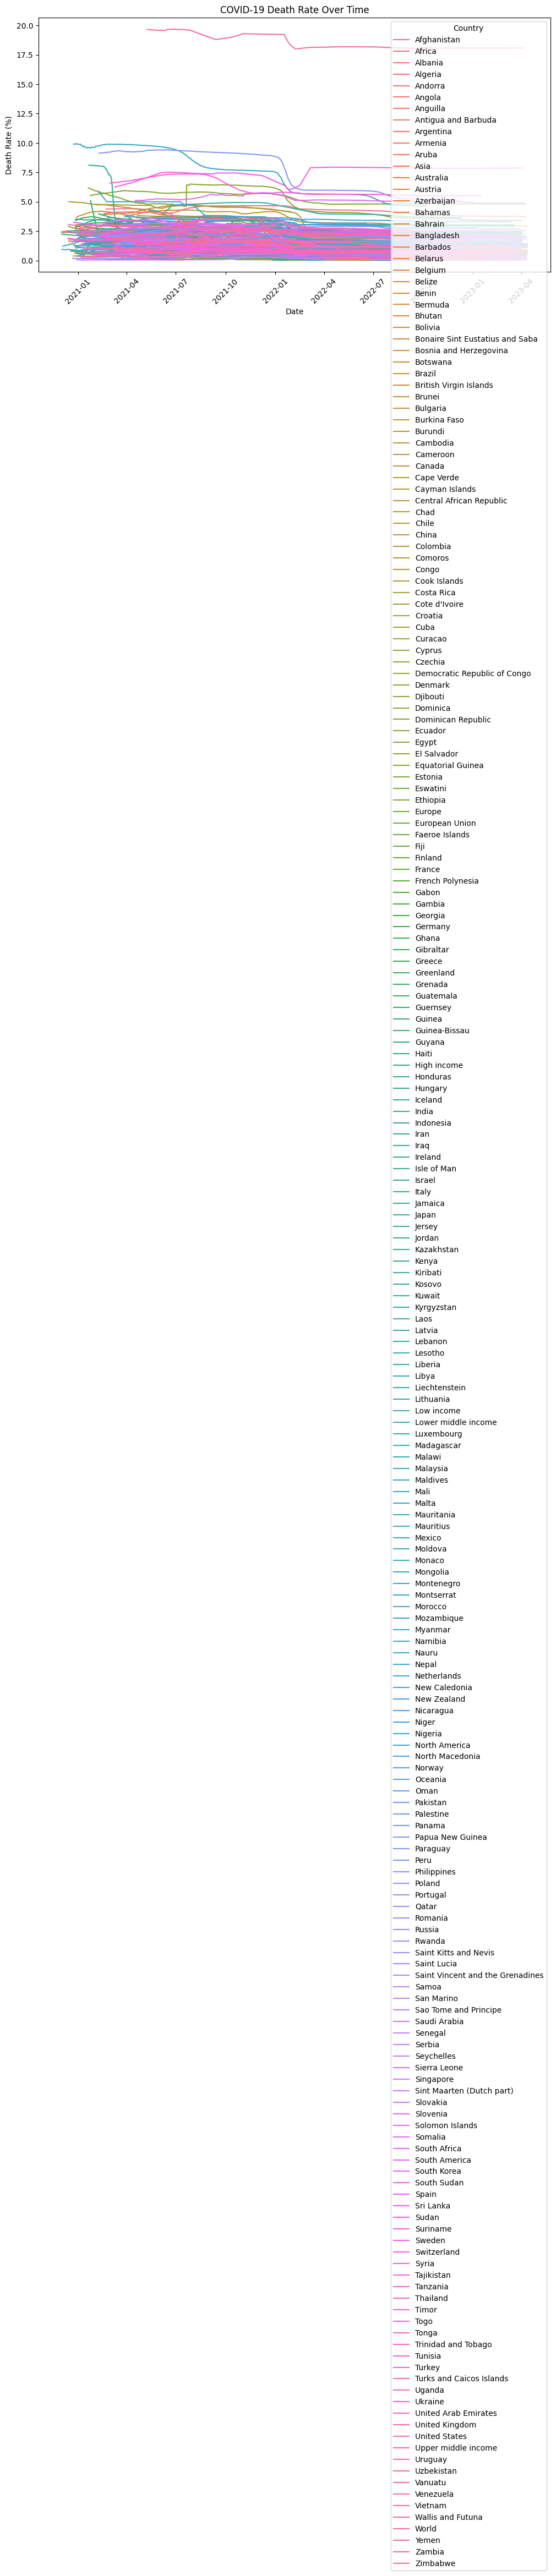

In [6]:
#Line charts (cases & deaths over time)
#Plot total cases over time for all countries 
plt.figure(figsize=(12, 6))
sns.lineplot(data=df[df['location'].isin(['United States', 'India', 'Brazil'])], x='date', y='total_cases', hue='location')
plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.legend(title='Country')
plt.show()
#Bar charts (top countries by total cases).
plt.figure(figsize=(12, 6))
top_countries = df[df['date'] == df['date'].max()].nlargest(10, 'total_cases')
sns.barplot(data=top_countries, x='total_cases', y='location')
plt.title('Top 10 Countries by Total COVID-19 Cases')
plt.xlabel('Total Cases')
plt.ylabel('Country')
plt.show()

#Plot total deaths over time.
plt.figure(figsize=(12, 6))
sns.lineplot(data=df[df['location'].isin(['United States', 'India', 'Brazil'])], x='date', y='total_deaths', hue='location')
plt.title('Total COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45)
plt.legend(title='Country')
plt.show()


#Compare daily new cases between countries.
df['new_cases'] = df['total_cases'].diff()
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='date', y='new_cases', hue='location')
plt.title('Daily New COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.xticks(rotation=45)
plt.legend(title='Country')
plt.show()

#Calculate the death rate
df['death_rate'] = df['total_deaths'] / df['total_cases'] * 100
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='date', y='death_rate', hue='location')
plt.title('COVID-19 Death Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Death Rate (%)')
plt.xticks(rotation=45)
plt.legend(title='Country')
plt.show()



 # Visualizing Vaccination Progress

Plot cumulative vaccinations over time for the selected countries.

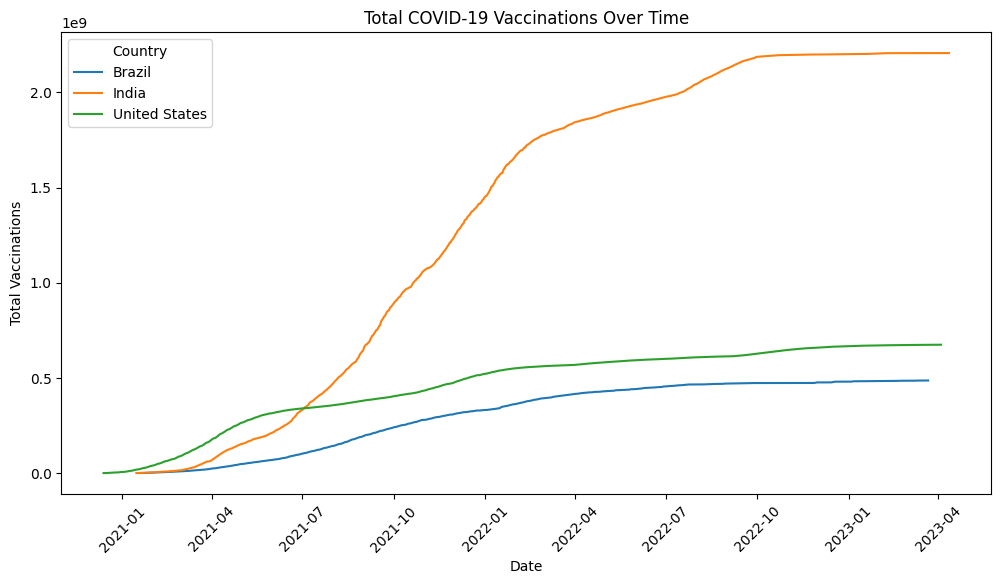

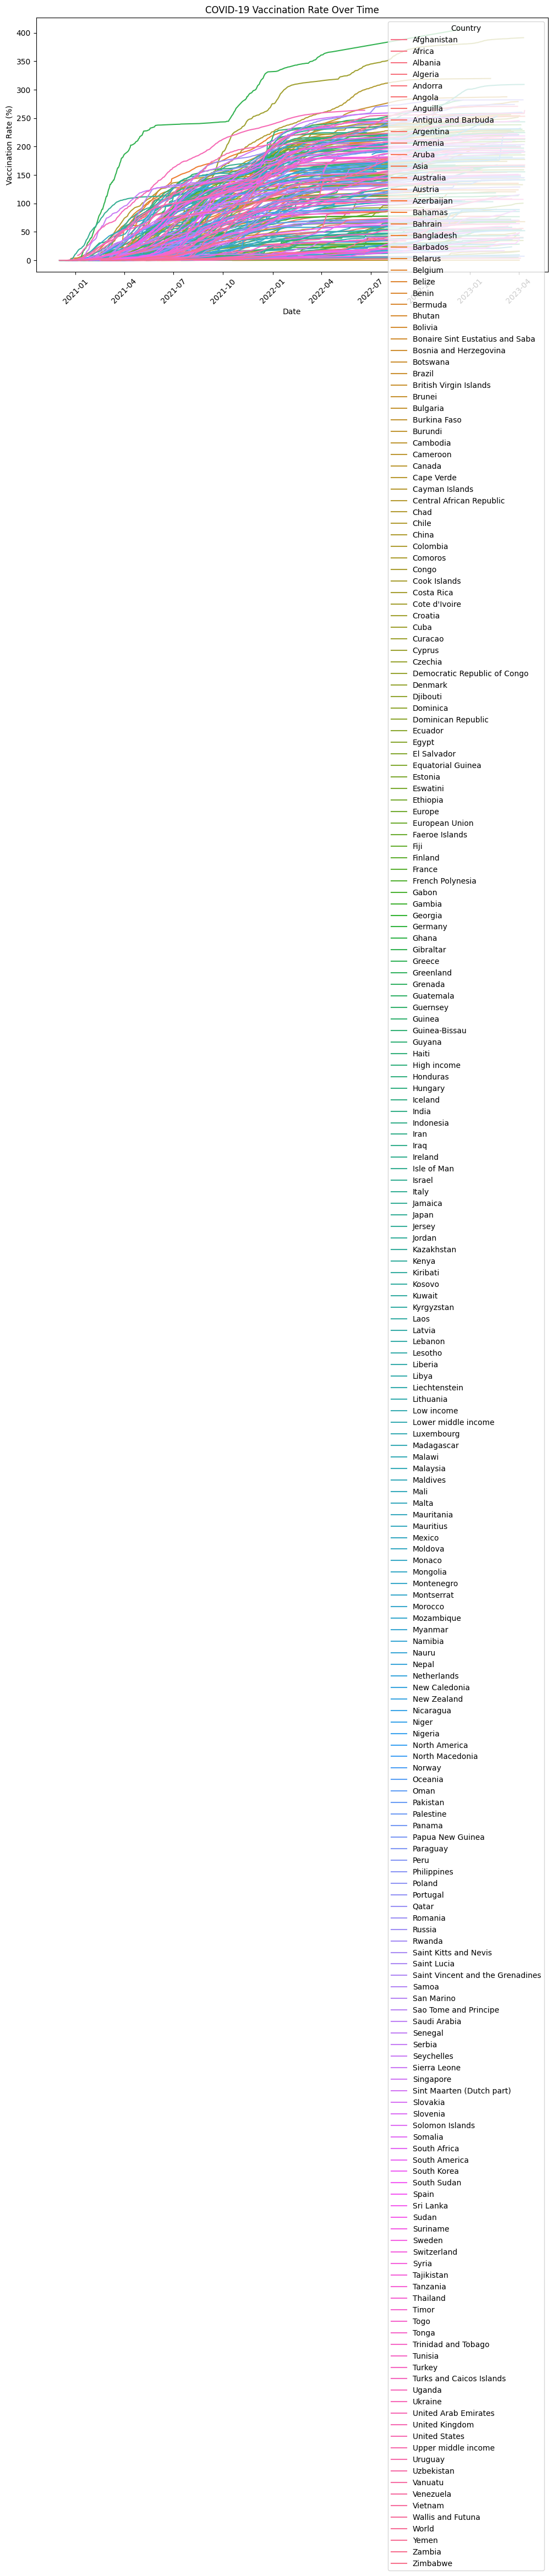

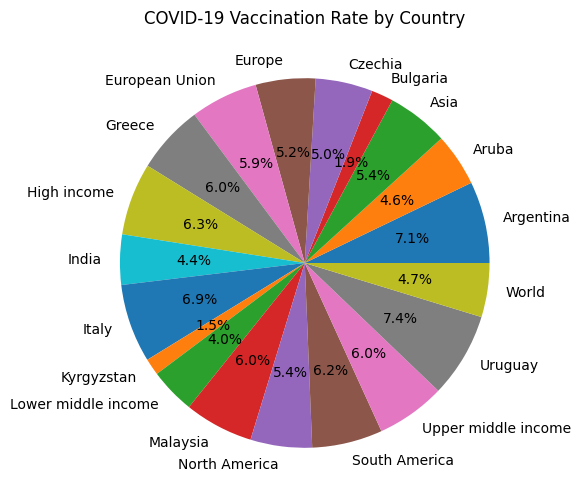

In [7]:
#Plot cumulative vaccinations over time for selected countries.
plt.figure(figsize=(12, 6))
sns.lineplot(data=df[df['location'].isin(['United States', 'India', 'Brazil'])], x='date', y='total_vaccinations', hue='location')
plt.title('Total COVID-19 Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.xticks(rotation=45)
plt.legend(title='Country')
plt.show()

#Compare % vaccinated population.
df['vaccination_rate'] = df['total_vaccinations'] / df['population'] * 100
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='date', y='vaccination_rate', hue='location')
plt.title('COVID-19 Vaccination Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Vaccination Rate (%)')
plt.xticks(rotation=45)
plt.legend(title='Country')
plt.show()
# Pie charts for vaccinated vs. unvaccinated.
plt.figure(figsize=(12, 6))
vaccination_counts = df[df['date'] == df['date'].max()].groupby('location')['vaccination_rate'].max()
plt.pie(vaccination_counts, labels=vaccination_counts.index, autopct='%1.1f%%')
plt.title('COVID-19 Vaccination Rate by Country')
plt.show()

#  Build a Choropleth Map
Prepare a dataframe with iso_code, total_cases for the latest date. Plot a choropleth showing case density or vaccination rates.


In [8]:
# Build a Choropleth Map
import plotly.express as px

latest_data = df[df['date'] == df['date'].max()]
fig = px.choropleth(latest_data,
                    locations="iso_code",
                    color="total_cases",
                    hover_name="location",
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.update_layout(title="COVID-19 Total Cases by Country",
                  geo=dict(showcoastlines=True, coastlinecolor="Black"))

fig.write_html("covid_map.html")
print("Map saved. Open covid_map.html in your browser.")


Map saved. Open covid_map.html in your browser.


# Insights & Reporting
Summarize findings.Write 3-5 key insights from the data,Highlight anomalies or interesting patterns.

In [9]:
# Insights & Reporting
insights = []

for country in countries:
    country_data = df_filtered[df_filtered['location'] == country].sort_values('date')
    if country_data.empty:
        insights.append(f"{country}: No data available")
        continue
    
    latest = country_data.iloc[-1]
    death_rate = latest['death_rate'] if 'death_rate' in latest else latest['total_deaths'] / latest['total_cases']
    
    insights.append({
        "country": country,
        "total_cases": int(latest['total_cases']),
        "total_deaths": int(latest['total_deaths']),
        "death_rate": death_rate
    })

# Print details per country
print("Latest Data Per Country:")
for item in insights:
    if isinstance(item, str):
        print(item)
    else:
        print(f"{item['country']} - Total Cases: {item['total_cases']}, "
              f"Total Deaths: {item['total_deaths']}, "
              f"Death Rate: {item['death_rate']:.2%}")

# Summarize 3–5 key insights
print("\nKey Insights:")
if insights:
    # Example insights based on collected data
    max_cases = max((i for i in insights if isinstance(i, dict)), key=lambda x: x['total_cases'])
    max_deaths = max((i for i in insights if isinstance(i, dict)), key=lambda x: x['total_deaths'])
    highest_death_rate = max((i for i in insights if isinstance(i, dict)), key=lambda x: x['death_rate'])
    
    print(f"- {max_cases['country']} has the highest total cases: {max_cases['total_cases']:,}")
    print(f"- {max_deaths['country']} has the highest total deaths: {max_deaths['total_deaths']:,}")
    print(f"- {highest_death_rate['country']} has the highest death rate: {highest_death_rate['death_rate']:.2%}")
    
    # Detect anomalies: countries with death rate > 5%
    high_death_rate_countries = [i['country'] for i in insights if isinstance(i, dict) and i['death_rate'] > 0.05]
    if high_death_rate_countries:
        print(f"- High death rates (>5%) found in: {', '.join(high_death_rate_countries)}")
    
    # Low case countries
    low_case_countries = [i['country'] for i in insights if isinstance(i, dict) and i['total_cases'] < 1000]
    if low_case_countries:
        print(f"- Countries with fewer than 1,000 cases: {', '.join(low_case_countries)}")


Latest Data Per Country:
Kenya - Total Cases: 342992, Total Deaths: 5688, Death Rate: 1.66%
USA: No data available
India - Total Cases: 44768172, Total Deaths: 531000, Death Rate: 1.19%

Key Insights:
- India has the highest total cases: 44,768,172
- India has the highest total deaths: 531,000
- Kenya has the highest death rate: 1.66%


# Allow user input 

In [10]:
#Allow user input(choose country & date range)
selected_country = input("Enter the country you want to analyze: ")
start_date = input("Enter the start date (YYYY-MM-DD): ")
end_date = input("Enter the end date (YYYY-MM-DD): ")
